# Example Usage of Vivarium-comets

Import all the needed libraries

In [1]:
import cobra
import cometspy as c
import matplotlib.pyplot as plt

from vivarium.core.engine import Engine

Import the vivarium-comets package. Eventually this would be replaced by pip installing vivarium-comets and importing it.

In [2]:
from vivarium_comets.processes import comets

## Ex 1: _E. coli_ core model in 1x1 grid

Load the COBRA textbook model and convert it to a COMETS model

In [3]:
e_coli_cobra = cobra.io.load_model('textbook')
e_coli = c.model(e_coli_cobra)

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


Change the bounds for reactions that will be dynamically updated, because the default bounds (0 and 1000) can cause problems

In [4]:
e_coli.change_bounds('EX_glc__D_e', -1000, 1000)
e_coli.change_bounds('EX_ac_e', -1000, 1000)

Set the settings, including the initial states, for the vivarium process

In [5]:
comets_config = {'time_step': 1.0,
                'dimensions': [1,1], # Doesn't actually do anything right now
                'models': [e_coli],
                'metabolite_ids': [met.id for met in e_coli_cobra.metabolites]}

comets_sim_settings = {'experiment_id': 'foo'}

comets_initial_state = {'Biomass': {'e_coli_core': 0.000005},
                        'Metabolites': {'glc__D_e': 0.011,
                                        'o2_e': 1000,
                                        'nh4_e': 1000,
                                        'pi_e': 1000,
                                        'h2o_e': 1000,
                                        'h_e': 1000}}

Initialize the process

In [6]:
comets_process = comets.Comets(comets_config)

Make the experiment

In [7]:
comets_exp = Engine(processes={'comets': comets_process},
                    topology={
                        'comets': {'Biomass': ('Biomass',),
                                   'Metabolites': ('Metabolites',)}},
                   initial_state = comets_initial_state)


Simulation ID: 96732f4c-49a1-11ed-b2fb-e21381af3f48
Created: 10/11/2022 at 16:16:28


Run the experiment

In [8]:
comets_exp.update(10.0)

building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...


/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

Done!
{'e_coli_core': 1.0553374271e-05}
   metabolite  cycle  x  y    conc_mmol
0    glc__D_e      0  1  1     0.011000
1       h2o_e      0  1  1  1000.000000
2         h_e      0  1  1  1000.000000
3       nh4_e      0  1  1  1000.000000
4        o2_e      0  1  1  1000.000000
5        pi_e      0  1  1  1000.000000
6        ac_e      1  1  1     0.000100
7       co2_e      1  1  1     0.000081
8       for_e      1  1  1     0.000037
9    glc__D_e      1  1  1     0.010908
10      h2o_e      1  1  1  1000.000121
11        h_e      1  1  1  1000.000248
12      nh4_e      1  1  1   999.999970
13       o2_e      1  1  1   999.999907
14       pi_e      1  1  1   999.999980
{'ac_e': 0.00010034511196, 'co2_e': 8.0613139471e-05, 'for_e': 3.6614230271e-05, 'glc__D_e': 0.010907625965, 'h2o_e': 1000.0001211, 'h_e': 1000.0002484, 'nh4_e': 999.99996972, 'o2_e': 999.9999075, 'pi_e': 999.99997957}
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simu

/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

Done!
{'e_coli_core': 2.2274668631e-05}
   metabolite  cycle  x  y    conc_mmol
0        ac_e      0  1  1     0.000100
1       co2_e      0  1  1     0.000081
2       for_e      0  1  1     0.000037
3    glc__D_e      0  1  1     0.010908
4       h2o_e      0  1  1  1000.000121
5         h_e      0  1  1  1000.000248
6       nh4_e      0  1  1   999.999970
7        o2_e      0  1  1   999.999907
8        pi_e      0  1  1   999.999980
9        ac_e      1  1  1     0.000312
10      co2_e      1  1  1     0.000251
11      for_e      1  1  1     0.000114
12   glc__D_e      1  1  1     0.010713
13      h2o_e      1  1  1  1000.000377
14        h_e      1  1  1  1000.000773
15      nh4_e      1  1  1   999.999906
16       o2_e      1  1  1   999.999712
17       pi_e      1  1  1   999.999936
{'ac_e': 0.00031213763005, 'co2_e': 0.00025076470551, 'for_e': 0.00011388791717, 'glc__D_e': 0.01071265666, 'h2o_e': 1000.0003766, 'h_e': 1000.0007726, 'nh4_e': 999.99990581, 'o2_e': 999.99971226, 'pi

/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

Done!
{'e_coli_core': 4.7014094509e-05}
   metabolite  cycle  x  y    conc_mmol
0        ac_e      0  1  1     0.000312
1       co2_e      0  1  1     0.000251
2       for_e      0  1  1     0.000114
3    glc__D_e      0  1  1     0.010713
4       h2o_e      0  1  1  1000.000377
5         h_e      0  1  1  1000.000773
6       nh4_e      0  1  1   999.999906
7        o2_e      0  1  1   999.999712
8        pi_e      0  1  1   999.999936
9        ac_e      1  1  1     0.000759
10      co2_e      1  1  1     0.000610
11      for_e      1  1  1     0.000277
12   glc__D_e      1  1  1     0.010301
13      h2o_e      1  1  1  1000.000916
14        h_e      1  1  1  1000.001879
15      nh4_e      1  1  1   999.999771
16       o2_e      1  1  1   999.999300
17       pi_e      1  1  1   999.999845
{'ac_e': 0.00075914581549, 'co2_e': 0.0006099138929, 'for_e': 0.00027695476989, 'glc__D_e': 0.010301151485, 'h2o_e': 1000.000916, 'h_e': 1000.0018789, 'nh4_e': 999.99977091, 'o2_e': 999.99930018, 'pi_

/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

Done!
{'e_coli_core': 9.9228859654e-05}
   metabolite  cycle  x  y    conc_mmol
0        ac_e      0  1  1     0.000759
1       co2_e      0  1  1     0.000610
2       for_e      0  1  1     0.000277
3    glc__D_e      0  1  1     0.010301
4       h2o_e      0  1  1  1000.000916
5         h_e      0  1  1  1000.001879
6       nh4_e      0  1  1   999.999771
7        o2_e      0  1  1   999.999300
8        pi_e      0  1  1   999.999845
9        ac_e      1  1  1     0.001703
10      co2_e      1  1  1     0.001368
11      for_e      1  1  1     0.000621
12   glc__D_e      1  1  1     0.009433
13      h2o_e      1  1  1  1000.002054
14        h_e      1  1  1  1000.004214
15      nh4_e      1  1  1   999.999486
16       o2_e      1  1  1   999.998430
17       pi_e      1  1  1   999.999653
{'ac_e': 0.0017025518868, 'co2_e': 0.0013680273863, 'for_e': 0.00062098023383, 'glc__D_e': 0.0094326553953, 'h2o_e': 1000.0020545, 'h_e': 1000.0042138, 'nh4_e': 999.99948619, 'o2_e': 999.99843042, 'pi

/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

Done!
{'e_coli_core': 0.00020942638181}
   metabolite  cycle  x  y    conc_mmol
0        ac_e      0  1  1     0.001703
1       co2_e      0  1  1     0.001368
2       for_e      0  1  1     0.000621
3    glc__D_e      0  1  1     0.009433
4       h2o_e      0  1  1  1000.002054
5         h_e      0  1  1  1000.004214
6       nh4_e      0  1  1   999.999486
7        o2_e      0  1  1   999.998430
8        pi_e      0  1  1   999.999653
9        ac_e      1  1  1     0.003693
10      co2_e      1  1  1     0.002968
11      for_e      1  1  1     0.001346
12   glc__D_e      1  1  1     0.007600
13      h2o_e      1  1  1  1000.004458
14        h_e      1  1  1  1000.009140
15      nh4_e      1  1  1   999.998885
16       o2_e      1  1  1   999.996595
17       pi_e      1  1  1   999.999248
{'ac_e': 0.0036933534806, 'co2_e': 0.002968491788, 'for_e': 0.0013463178933, 'glc__D_e': 0.0075998360782, 'h2o_e': 1000.0044577, 'h_e': 1000.0091405, 'nh4_e': 999.9988853, 'o2_e': 999.99659469, 'pi_e'

/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

Done!
{'e_coli_core': 0.00044195444039}
   metabolite  cycle  x  y    conc_mmol
0        ac_e      0  1  1     0.003693
1       co2_e      0  1  1     0.002968
2       for_e      0  1  1     0.001346
3    glc__D_e      0  1  1     0.007600
4       h2o_e      0  1  1  1000.004458
5         h_e      0  1  1  1000.009140
6       nh4_e      0  1  1   999.998885
7        o2_e      0  1  1   999.996595
8        pi_e      0  1  1   999.999248
9        ac_e      1  1  1     0.007893
10      co2_e      1  1  1     0.006349
11      for_e      1  1  1     0.002873
12   glc__D_e      1  1  1     0.003733
13      h2o_e      1  1  1  1000.009532
14        h_e      1  1  1  1000.019531
15      nh4_e      1  1  1   999.997617
16       o2_e      1  1  1   999.992720
17       pi_e      1  1  1   999.998393
{'ac_e': 0.0078927880689, 'co2_e': 0.0063485992894, 'for_e': 0.0028725302783, 'glc__D_e': 0.0037330799349, 'h2o_e': 1000.0095316, 'h_e': 1000.0195307, 'nh4_e': 999.99761737, 'o2_e': 999.9927203, 'pi_e

/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

Done!
{'e_coli_core': 0.00076319797664}
   metabolite  cycle  x  y    conc_mmol
0        ac_e      0  1  1     0.007893
1       co2_e      0  1  1     0.006349
2       for_e      0  1  1     0.002873
3    glc__D_e      0  1  1     0.003733
4       h2o_e      0  1  1  1000.009532
5         h_e      0  1  1  1000.019531
6       nh4_e      0  1  1   999.997617
7        o2_e      0  1  1   999.992720
8        pi_e      0  1  1   999.998393
9        ac_e      1  1  1     0.007983
10      co2_e      1  1  1     0.014896
11      for_e      1  1  1     0.002873
12      h2o_e      1  1  1  1000.020419
13        h_e      1  1  1  1000.026065
14      nh4_e      1  1  1   999.995866
15       o2_e      1  1  1   999.984544
16       pi_e      1  1  1   999.997211
{'ac_e': 0.0079829148817, 'co2_e': 0.014896145966, 'for_e': 0.0028725302783, 'h2o_e': 1000.0204192, 'h_e': 1000.026065, 'nh4_e': 999.99586569, 'o2_e': 999.98454414, 'pi_e': 999.99721082, 'glc__D_e': 0.0}
building empty layout model
models w

/Users/helenscott/Documents/PhD/Segre-lab/vivarium-comets/vivarium_comets/processes/comets.py:155: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_recent_media = most_recent_media.append({'metabolite': met_id, 'conc_mmol': 0}, ignore_index=True) #TODO: Need to make space explicit
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' 

Done!
{'e_coli_core': 0.00090306893683}
   metabolite  cycle  x  y    conc_mmol
0        ac_e      0  1  1     0.007983
1       co2_e      0  1  1     0.014896
2       for_e      0  1  1     0.002873
3       h2o_e      0  1  1  1000.020419
4         h_e      0  1  1  1000.026065
5       nh4_e      0  1  1   999.995866
6        o2_e      0  1  1   999.984544
7        pi_e      0  1  1   999.997211
8       co2_e      1  1  1     0.024910
9       for_e      1  1  1     0.002873
10      h2o_e      1  1  1  1000.031452
11        h_e      1  1  1  1000.020888
12      nh4_e      1  1  1   999.995103
13       o2_e      1  1  1   999.974692
14       pi_e      1  1  1   999.996696
{'co2_e': 0.024909697083, 'for_e': 0.0028725302783, 'h2o_e': 1000.0314516, 'h_e': 1000.0208879, 'nh4_e': 999.995103, 'o2_e': 999.97469229, 'pi_e': 999.99669628, 'ac_e': 0.0}
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...


/Users/helenscott/Documents/PhD/Segre-lab/vivarium-comets/vivarium_comets/processes/comets.py:155: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_recent_media = most_recent_media.append({'metabolite': met_id, 'conc_mmol': 0}, ignore_index=True) #TODO: Need to make space explicit
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' 

Done!
{'e_coli_core': 0.00090306893683}
   metabolite  cycle  x  y    conc_mmol
0       co2_e      0  1  1     0.024910
1       for_e      0  1  1     0.002873
2       h2o_e      0  1  1  1000.031452
3         h_e      0  1  1  1000.020888
4       nh4_e      0  1  1   999.995103
5        o2_e      0  1  1   999.974692
6        pi_e      0  1  1   999.996696
7       co2_e      1  1  1     0.024910
8       for_e      1  1  1     0.002873
9       h2o_e      1  1  1  1000.031452
10        h_e      1  1  1  1000.020888
11      nh4_e      1  1  1   999.995103
12       o2_e      1  1  1   999.974692
13       pi_e      1  1  1   999.996696
{'co2_e': 0.024909697083, 'for_e': 0.0028725302783, 'h2o_e': 1000.0314516, 'h_e': 1000.0208879, 'nh4_e': 999.995103, 'o2_e': 999.97469229, 'pi_e': 999.99669628}
building empty layout model
models will need to be added with layout.add_model()

Running COMETS simulation ...


/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

Done!
{'e_coli_core': 0.00090306893683}
   metabolite  cycle  x  y    conc_mmol
0       co2_e      0  1  1     0.024910
1       for_e      0  1  1     0.002873
2       h2o_e      0  1  1  1000.031452
3         h_e      0  1  1  1000.020888
4       nh4_e      0  1  1   999.995103
5        o2_e      0  1  1   999.974692
6        pi_e      0  1  1   999.996696
7       co2_e      1  1  1     0.024910
8       for_e      1  1  1     0.002873
9       h2o_e      1  1  1  1000.031452
10        h_e      1  1  1  1000.020888
11      nh4_e      1  1  1   999.995103
12       o2_e      1  1  1   999.974692
13       pi_e      1  1  1   999.996696
{'co2_e': 0.024909697083, 'for_e': 0.0028725302783, 'h2o_e': 1000.0314516, 'h_e': 1000.0208879, 'nh4_e': 999.995103, 'o2_e': 999.97469229, 'pi_e': 999.99669628}
Completed in 20.50 seconds


Retrieve the results as a time series

In [9]:
comets_output = comets_exp.emitter.get_timeseries()

Plot the results

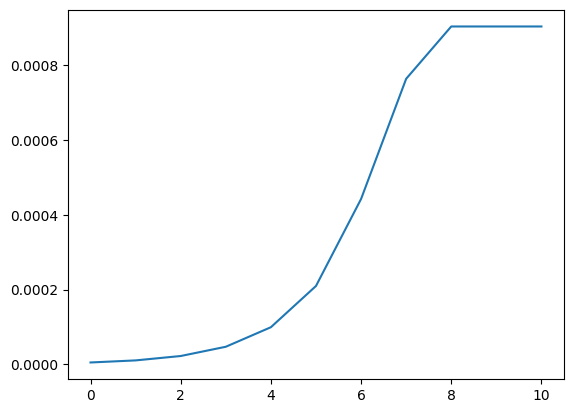

In [10]:
plt.plot(comets_output['time'], comets_output['Biomass']['e_coli_core'])
plt.show()

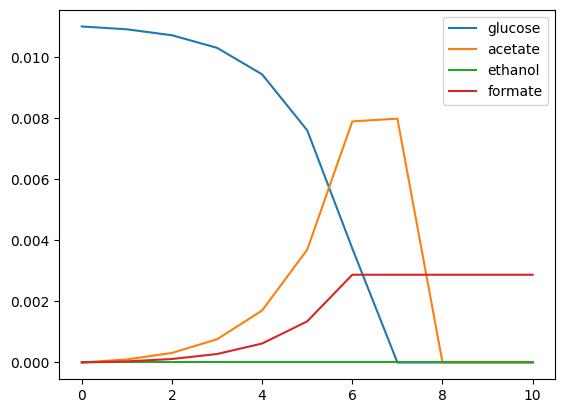

In [11]:
plt.plot(comets_output['time'], comets_output['Metabolites']['glc__D_e'], label = "glucose")
plt.plot(comets_output['time'], comets_output['Metabolites']['ac_e'], label = "acetate")
plt.plot(comets_output['time'], comets_output['Metabolites']['etoh_e'], label = "ethanol")
plt.plot(comets_output['time'], comets_output['Metabolites']['for_e'], label = "formate")
plt.legend()
plt.show()

## Ex 3: _E. coli_ core model in 3x3 grid

Non-homogenous layouts aren't supported yet

## Ex 4: Community

Non-homogenous layouts aren't supported yet